In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
import seaborn as sns

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

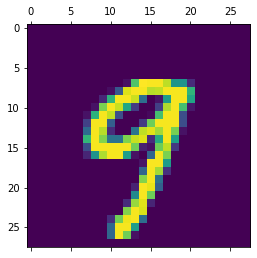

In [8]:
plt.matshow(x_train[45])

In [9]:
y_train[45]

9

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train_flattend=x_train.reshape(len(x_train),28*28)
x_train_flattend.shape

(60000, 784)

In [12]:
x_test_flattend=x_test.reshape(len(x_test),28*28)
x_test_flattend.shape


(10000, 784)

In [13]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4730 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3043 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2834 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2733 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2668 - accuracy: 0.9256


In [14]:
model.evaluate(x_test_flattend,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2683 - accuracy: 0.9256


[0.2682953178882599, 0.925599992275238]

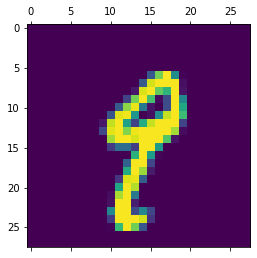

In [15]:
plt.matshow(x_test[78])

In [16]:
y_pre=model.predict(x_test_flattend)

In [17]:
y_pre[78]

array([3.1726406e-05, 5.5809587e-02, 1.3960302e-03, 3.8069689e-01,
       1.6096503e-01, 1.2182346e-01, 1.2259034e-04, 1.9858620e-01,
       6.7328304e-01, 9.0038413e-01], dtype=float32)

In [18]:
np.argmax(y_pre[78])

9

In [19]:
y_pre_lab=[np.argmax(i) for i in y_pre]

In [20]:
y_pre_lab[:6]

[7, 2, 1, 0, 4, 1]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pre_lab)

Text(69.0, 0.5, 'Truth')

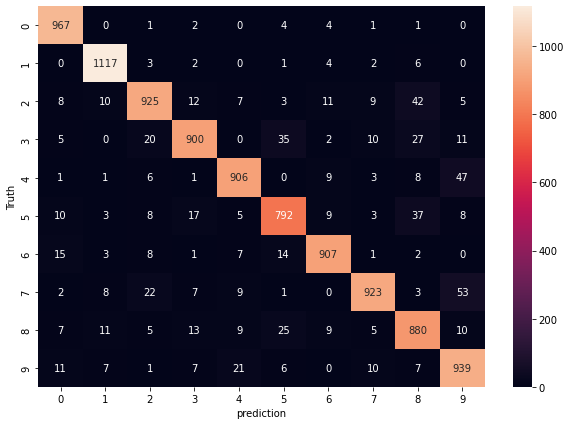

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel("Truth")

In [23]:
#adding one a hidden layer 

In [24]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation="relu"),
                       keras.layers.Dense(10,activation="sigmoid")])


model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2794 - accuracy: 0.9195
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1238 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0857 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0651 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0505 - accuracy: 0.9844


In [25]:
model.evaluate(x_test_flattend,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9775


[0.07635118067264557, 0.9775000214576721]

Text(69.0, 0.5, 'Truth')

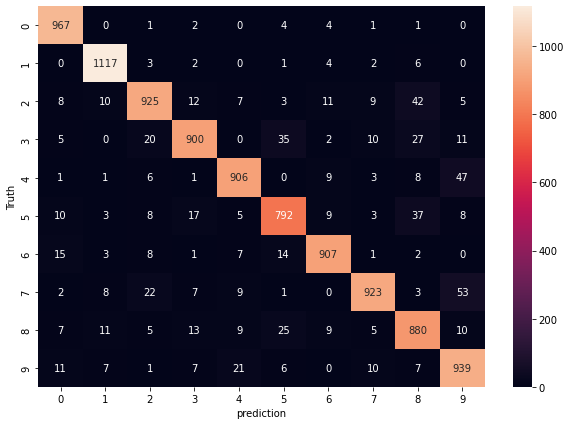

In [26]:
y_pre_lab=[np.argmax(i) for i in y_pre]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pre_lab)



plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel("Truth")


In [27]:
#adding 2 hidden layers 

In [28]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation="relu"),
                       keras.layers.Dense(120,activation="relu"),
                       keras.layers.Dense(10,activation="sigmoid")])


model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2395 - accuracy: 0.9300
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1052 - accuracy: 0.9686
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0733 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0564 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0457 - accuracy: 0.9851


In [29]:
model.evaluate(x_test_flattend,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0973 - accuracy: 0.9712


[0.09730605036020279, 0.9711999893188477]